In [416]:
# NH4

In [417]:
library(ggplot2)
library(tidyverse)

In [418]:
getwd()

[1] "/Users/brookesienkiewicz/Documents/sctld/Nutrients/mbl_nuts"

In [419]:
sample_list<-read.csv('metadata/nh4_sample_list.csv')
metadata <- read.csv('metadata/samples_kinda_filtered.csv')

In [420]:
nh4<-read.csv('nh4_raw.csv')

In [421]:
nh4<-nh4 %>%
    rename(OD = WL640.0,
           excel_conc = X.NH4.)

In [422]:
# stnd curve --------------------------------------------------------

In [423]:
stnd<-nh4 %>%
    filter(Sample.ID == 'stnd')

In [424]:
stnd<-stnd %>%
    mutate(predicted = as.numeric(Sample.Name)) %>%
    select(-Sample.Name,-Sample.ID,-Date)

In [425]:
curve<-lm(OD ~ predicted, data = stnd)

In [426]:
summary(curve)


Call:
lm(formula = OD ~ predicted, data = stnd)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0162314 -0.0025017 -0.0004193  0.0047486  0.0126609 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0047404  0.0014464  -3.277  0.00253 ** 
predicted    0.0179836  0.0000766 234.765  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.007027 on 32 degrees of freedom
Multiple R-squared:  0.9994,	Adjusted R-squared:  0.9994 
F-statistic: 5.511e+04 on 1 and 32 DF,  p-value: < 2.2e-16


[1] 0.9994197

`geom_smooth()` using formula = 'y ~ x'
Warning message in plot_theme(plot):
“The `size` theme element is not defined in the element hierarchy.”


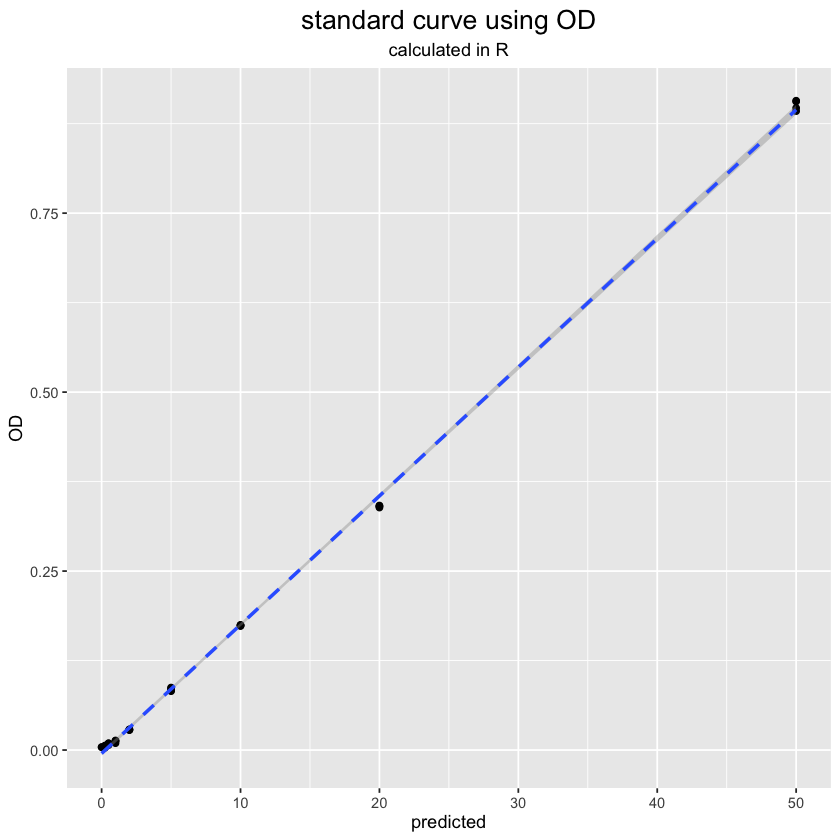

In [427]:
r_squared <- summary(curve)$r.squared
r_squared

ggplot(data = stnd, aes(x = predicted, y = OD))+
    geom_point() +
    geom_smooth(method = "lm", linetype = "dashed")+
    labs(title = "standard curve using OD", subtitle = 'calculated in R')+
    theme(plot.title = element_text(hjust = 0.5, size = 16),
         plot.subtitle = element_text(hjust = 0.5), size = 14)

In [428]:
# predict and compare to my excel predictions
inverse <- lm(predicted ~ OD, data = stnd)
summary(inverse)
stnd$r_conc<-predict(inverse, newdata = stnd)


Call:
lm(formula = predicted ~ OD, data = stnd)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68066 -0.26967  0.02044  0.13432  0.90759 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.26950    0.07978   3.378  0.00193 ** 
OD          55.57398    0.23672 234.765  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3906 on 32 degrees of freedom
Multiple R-squared:  0.9994,	Adjusted R-squared:  0.9994 
F-statistic: 5.511e+04 on 1 and 32 DF,  p-value: < 2.2e-16


[1] 0.999366

`geom_smooth()` using formula = 'y ~ x'
Warning message in plot_theme(plot):
“The `size` theme element is not defined in the element hierarchy.”


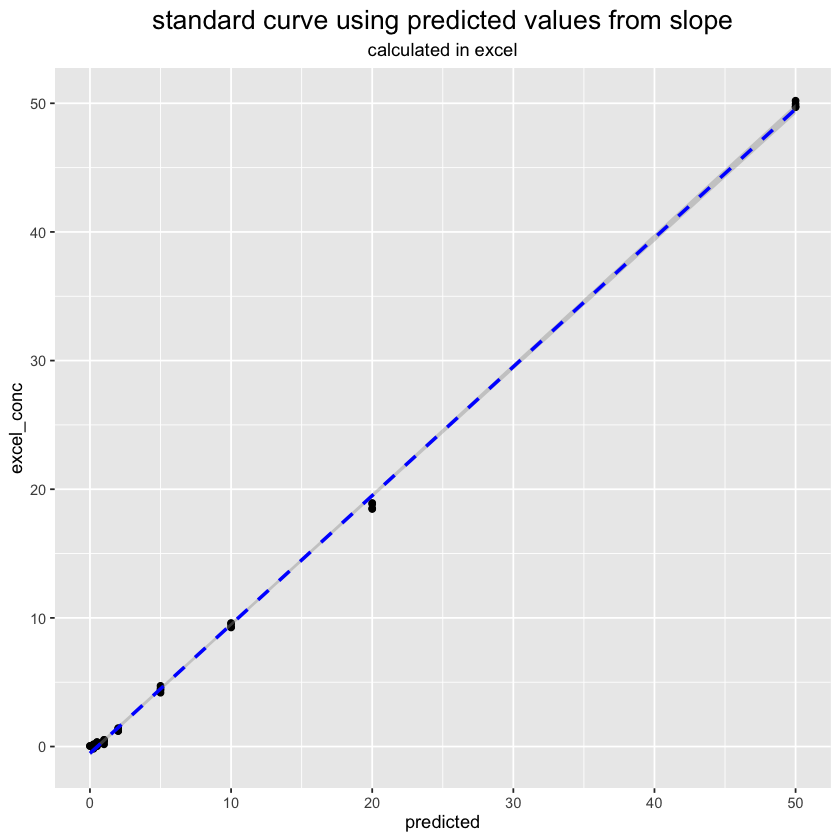

In [429]:
excel <- lm(excel_conc ~ predicted, data = stnd)
excel_r_squared <- summary(excel)$r.squared
excel_r_squared

ggplot(data = stnd, aes(x = predicted, y = excel_conc))+
    geom_point() +
    geom_smooth(method = "lm", linetype = "dashed", color = 'blue')+
    labs(title = "standard curve using predicted values from slope", subtitle = 'calculated in excel')+
    theme(plot.title = element_text(hjust = 0.5, size = 16),
         plot.subtitle = element_text(hjust = 0.5), size = 14)

[1] 0.9994197

`geom_smooth()` using formula = 'y ~ x'
Warning message in plot_theme(plot):
“The `size` theme element is not defined in the element hierarchy.”


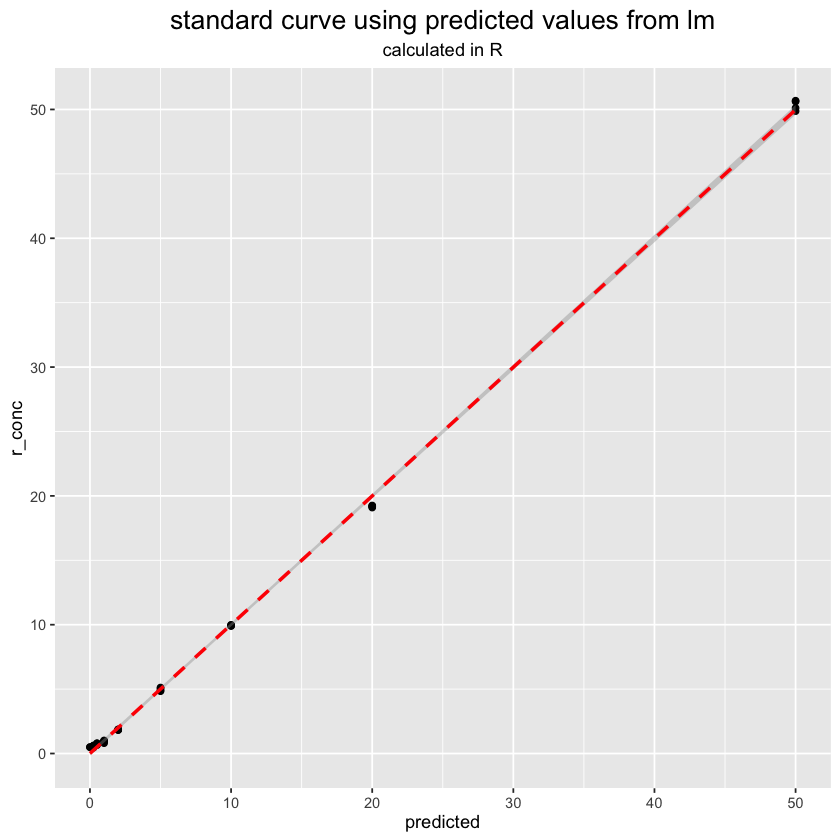

In [430]:
inverse_r_squared <- summary(inverse)$r.squared
inverse_r_squared

ggplot(data = stnd, aes(x = predicted, y = r_conc))+
    geom_point() +
    geom_smooth(method = "lm", linetype = "dashed", color = 'red')+
    labs(title = "standard curve using predicted values from lm", subtitle = 'calculated in R')+
    theme(plot.title = element_text(hjust = 0.5, size = 16),
         plot.subtitle = element_text(hjust = 0.5), size = 14)

In [431]:
stnd

RowID,Time,OD,excel_conc,predicted,r_conc
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
9,4:42:11 PM,0.0040,0.039,0.00,0.4917996
10,4:42:53 PM,0.0063,0.169,0.25,0.6196198
11,4:43:22 PM,0.0093,0.337,0.50,0.7863417
12,4:43:55 PM,0.0124,0.511,1.00,0.9586211
13,4:44:24 PM,0.0279,1.382,2.00,1.8200177
14,4:44:54 PM,0.0835,4.506,5.00,4.9099310
15,4:45:47 PM,0.1732,9.545,10.00,9.8949169
16,4:46:10 PM,0.3387,18.843,20.00,19.0924105
17,4:46:31 PM,0.8925,49.955,50.00,49.8692803


In [432]:
# samples ------------------------------------------------------------

In [433]:
# use 'inverse' model to calculate unknowns 

In [434]:
# combine og with predicted values
nh4<-nh4 %>% 
    left_join(stnd%>%select(RowID,OD,predicted,r_conc), 
              by = c('RowID','OD'))

In [435]:
nh4<-nh4 %>%
    select(-RowID,-Date,-excel_conc)

In [436]:
summary(inverse)


Call:
lm(formula = predicted ~ OD, data = stnd)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68066 -0.26967  0.02044  0.13432  0.90759 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.26950    0.07978   3.378  0.00193 ** 
OD          55.57398    0.23672 234.765  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3906 on 32 degrees of freedom
Multiple R-squared:  0.9994,	Adjusted R-squared:  0.9994 
F-statistic: 5.511e+04 on 1 and 32 DF,  p-value: < 2.2e-16


In [437]:
# predict
# given OD, "inverse" model predicts concentration based on standard curve 
nh4$r_conc<-predict(inverse, newdata = nh4)

In [438]:
head(nh4)

,Sample.Name,Sample.ID,Time,OD,predicted,r_conc
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,DI,,4:36:13 PM,-0.0026,NA,0.1250114
2,DI,,4:38:12 PM,-0.0002,NA,0.2583889
3,DI,,4:38:33 PM,-0.0002,NA,0.2583889
4,DI,,4:39:00 PM,-0.0002,NA,0.2583889
5,DI,,4:39:37 PM,0.0000,NA,0.2695037
6,DI,,4:39:57 PM,0.0000,NA,0.2695037


In [439]:
# filter for samples only 
samples <- nh4 %>%
    filter(!Sample.Name =='DI') %>%
    filter(!Sample.Name =='0 STND') %>%
    filter(!Sample.ID == 'stnd') %>%
# add rack numbers 
    mutate(Rack.ID = if_else(
        Sample.ID == '','R1',Sample.ID
    )) %>%
    select(-predicted,-Time,-Sample.ID)

In [440]:
head(samples)

,Sample.Name,OD,r_conc,Rack.ID
,<chr>,<dbl>,<dbl>,<chr>
1,A1,0.0097,0.8085713,R1
2,A2,0.0141,1.0530968,R1
3,A3,0.0285,1.8533621,R1
4,A4,0.0123,0.9530637,R1
5,A5,0.0134,1.0141950,R1
6,A6,0.0123,0.9530637,R1


In [441]:
# combine metadata -----------------------------------

In [442]:
# combine by matching sample ID 

In [443]:
head(sample_list)
colnames(sample_list)

,Date,T,Sample,nh4.rack,nh4.col,nh4..,X
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>
1,01/2024,T1,2,1,A,1,
2,01/2024,T1,3,1,A,2,
3,01/2024,T1,8,1,A,3,
4,01/2024,T1,15,1,A,4,
5,01/2024,T1,18,1,A,5,
6,01/2024,T2,23,1,A,6,


[1] "Date"     "T"        "Sample"   "nh4.rack" "nh4.col"  "nh4.."    "X"

In [444]:
# change Date format to match metadata 
# update rack numbers cell numbers 
sample_list<-sample_list %>%
    mutate(nh4.rack = paste0('R',nh4.rack),
           Sample.Name = paste0(nh4.col,nh4..),
           Date = as.Date(paste0("01/", Date), format = "%d/%m/%Y")) %>%
    rename(notes = X) %>%
    select (-nh4.col,-nh4..)

In [445]:
head(sample_list)

,Date,T,Sample,nh4.rack,notes,Sample.Name
,<date>,<chr>,<int>,<chr>,<chr>,<chr>
1,2024-01-01,T1,2,R1,,A1
2,2024-01-01,T1,3,R1,,A2
3,2024-01-01,T1,8,R1,,A3
4,2024-01-01,T1,15,R1,,A4
5,2024-01-01,T1,18,R1,,A5
6,2024-01-01,T2,23,R1,,A6


In [446]:
unique(sample_list$Date)

[1] "2024-01-01" "2024-05-01" "2024-06-01" "2024-08-01" "2025-06-01"

In [447]:
# add meta columns to sample df 
    # change format of Transect and sample ID on metadata
metadata<-metadata%>%
    mutate(T=paste0('T',transect))%>%
    rename(Sample=nutrient_sample_) %>%
    mutate(Sample = str_replace(Sample, 'N',''))%>%
    mutate(Sample = str_replace(Sample, 'filter','0')) %>%
        # idk why 0 won't convert to numeric -> its converting to NA but whatever, that sample should only be present in CHLA analysis anyway 
    mutate(Sample = as.numeric(Sample)) %>%
    #change date format 
    mutate(date = as.Date(Date))

# pull out Transect it is currently labelled as 
# pull out transect it needs to be changed to (in samples)

metadata<-metadata %>%
    mutate(old_T = sapply(strsplit(metadata$notes,split = 'as '), "[",2)) %>%
    mutate(new_T = T)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Sample = as.numeric(Sample)`.
Caused by warning:
! NAs introduced by coercion”


In [448]:
# join 
sample_list<-sample_list %>%
    left_join(metadata%>%select(new_T,old_T, Sample, meter, notes, monthyear), by = 'Sample')
# update incorrectly labelled sample locations
sample_list<-sample_list %>%
    mutate(T_copy = new_T)

In [449]:
# replace NAs in T 
sample_list<-sample_list %>% 
    mutate(T_copy = if_else(
        # if t_copy is NA, replace with T. If not, leave it 
        is.na(T_copy),
        T,
        T_copy))

In [450]:
# replace spaces in notes columns with NA 
sample_list$notes.x[sample_list$notes.x == ""] <- NA
sample_list$notes.y[sample_list$notes.y == ""] <- NA

In [451]:
unique(sample_list$notes.y)
unique(sample_list$notes.x)

[1] "labelled as T1"                      
[2] "labelled as T2"                      
[3] NA                                    
[4] "labelled as T5"                      
[5] "lost syringes, used whirlpacks"      
[6] "lost syringes, one sample per meter" 
[7] "lost syringes, one sample per meter "
[8] "redo"

[1] NA                              "EXCLUDE NH4 NOT ENOUGH SAMPLE"
[3] "NOT ENOUGH SAMPLE FOR NH4"     "blank"

In [452]:
# fix notes columns 

# remove samples that were not actually included in the run 
    # (values that say 'excluded' in the notes column)
sample_list<-sample_list %>%
    filter(is.na(notes.x) | notes.x == 'blank')

sample_list %>%
    filter(notes.x == 'blank')
# add "blank" note to notes.y and del notes.x col 
sample_list<-sample_list %>%
    mutate(notes.y = if_else(
        Sample == 93, 'blank',notes.y
    ))

Date,T,Sample,nh4.rack,notes.x,Sample.Name,new_T,old_T,meter,notes.y,monthyear,T_copy
<date>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2025-06-01,T1,93,R2,blank,B7,T1,NA,DI,NA,Jun 2025,T1


In [453]:
head(sample_list)

,Date,T,Sample,nh4.rack,notes.x,Sample.Name,new_T,old_T,meter,notes.y,monthyear,T_copy
,<date>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2024-01-01,T1,2,R1,NA,A1,T5,T1,50,labelled as T1,Jan 2024,T5
2,2024-01-01,T1,3,R1,NA,A2,T5,T1,40,labelled as T1,Jan 2024,T5
3,2024-01-01,T1,8,R1,NA,A3,T5,T1,30,labelled as T1,Jan 2024,T5
4,2024-01-01,T1,15,R1,NA,A4,T5,T1,20,labelled as T1,Jan 2024,T5
5,2024-01-01,T1,18,R1,NA,A5,T5,T1,10,labelled as T1,Jan 2024,T5
6,2024-01-01,T2,23,R1,NA,A6,T1,T2,10,labelled as T2,Jan 2024,T1


In [454]:
# remove extra cols 
sample_list<-sample_list %>%
    select(-new_T,-old_T,-T,-notes.x) %>%
    rename(T = T_copy,
          Rack.ID = nh4.rack)

In [455]:
head(sample_list)

,Date,Sample,Rack.ID,Sample.Name,meter,notes.y,monthyear,T
,<date>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2024-01-01,2,R1,A1,50,labelled as T1,Jan 2024,T5
2,2024-01-01,3,R1,A2,40,labelled as T1,Jan 2024,T5
3,2024-01-01,8,R1,A3,30,labelled as T1,Jan 2024,T5
4,2024-01-01,15,R1,A4,20,labelled as T1,Jan 2024,T5
5,2024-01-01,18,R1,A5,10,labelled as T1,Jan 2024,T5
6,2024-01-01,23,R1,A6,10,labelled as T2,Jan 2024,T1


In [456]:
# add location names 
sample_list<-sample_list %>%
    mutate(site = case_when(
        T == 'T1' ~ 'CBC30N',
        T == 'T2' ~ 'SR30N',
        T == 'T3' ~ 'Lagoon',
        T == 'T5' ~ 'BB',
        T == 'T6' ~ 'Hangman'))

In [457]:
# combine with concentrations

In [458]:
samples<-samples %>%
    left_join(sample_list, by = c('Sample.Name','Rack.ID'))

In [459]:
# replace NAs in monthyear
samples<-samples %>%
    mutate(monthyear = case_when(
        Date == '2024-05-01' ~ 'Apr 2024',
        Date ==  '2024-06-01' ~ 'Jun 2024',
        TRUE ~monthyear
    ))

In [460]:
head(samples)

,Sample.Name,OD,r_conc,Rack.ID,Date,Sample,meter,notes.y,monthyear,T,site
,<chr>,<dbl>,<dbl>,<chr>,<date>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A1,0.0097,0.8085713,R1,2024-01-01,2,50,labelled as T1,Jan 2024,T5,BB
2,A2,0.0141,1.0530968,R1,2024-01-01,3,40,labelled as T1,Jan 2024,T5,BB
3,A3,0.0285,1.8533621,R1,2024-01-01,8,30,labelled as T1,Jan 2024,T5,BB
4,A4,0.0123,0.9530637,R1,2024-01-01,15,20,labelled as T1,Jan 2024,T5,BB
5,A5,0.0134,1.0141950,R1,2024-01-01,18,10,labelled as T1,Jan 2024,T5,BB
6,A6,0.0123,0.9530637,R1,2024-01-01,23,10,labelled as T2,Jan 2024,T1,CBC30N


In [461]:
 # plot ------------------------------

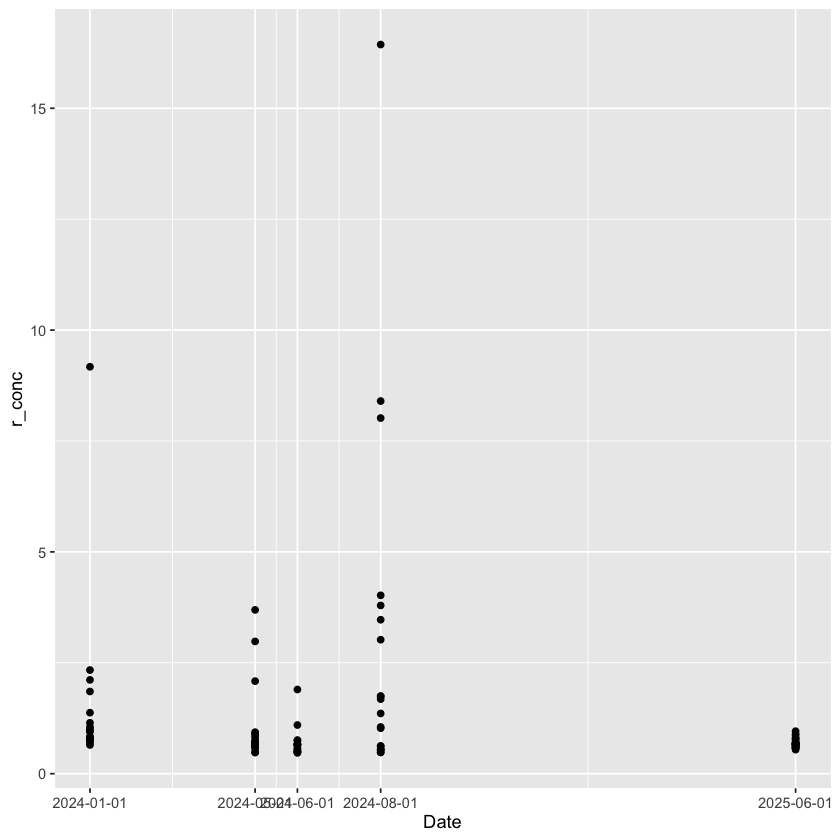

In [462]:
# plot conc by date 
ggplot(samples, aes(x = Date, y = r_conc))+
    geom_point()+
    scale_x_date(breaks = unique(sample_list$Date))

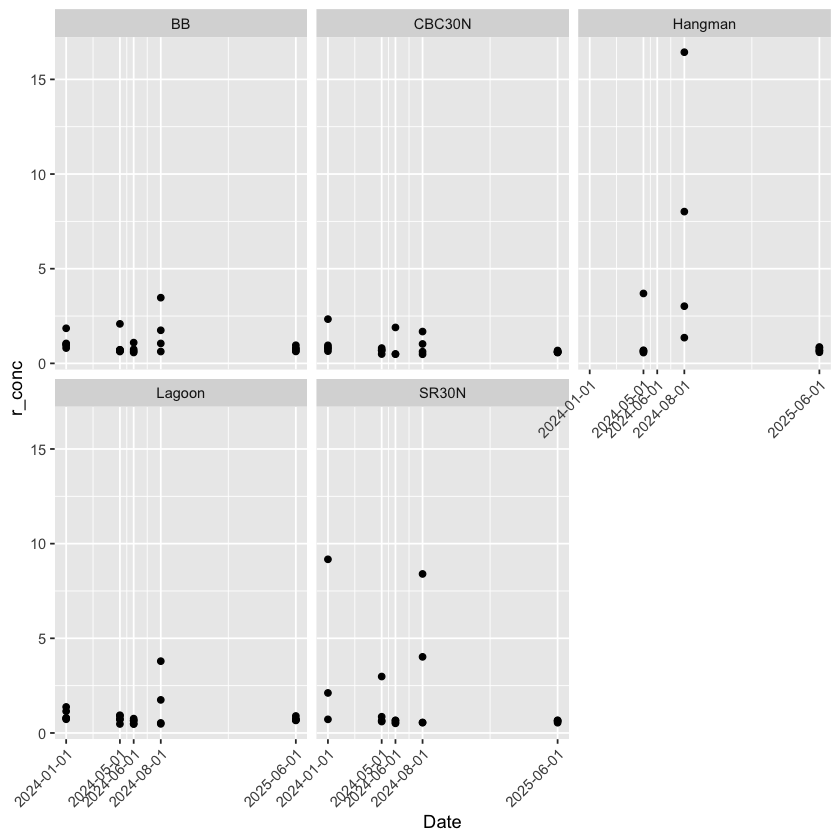

In [463]:
# facet by location 
ggplot(samples, aes(x = Date, y = r_conc))+
    geom_point()+
    facet_wrap(~ site)+
    scale_x_date(breaks = unique(samples$Date))+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [464]:
# get avgs 
samples %>%
    group_by(site,Date,monthyear) %>%
    summarise(nh4_mean = mean(r_conc),
             sd = sd(r_conc)) 

`summarise()` has grouped output by 'site', 'Date'. You can override using the
`.groups` argument.


site,Date,monthyear,nh4_mean,sd
<chr>,<date>,<chr>,<dbl>,<dbl>
BB,2024-01-01,Jan 2024,1.1364578,0.41139762
BB,2024-05-01,Apr 2024,0.8792297,0.53337235
BB,2024-06-01,Jun 2024,0.7655015,0.23165641
BB,2024-08-01,Aug 2024,1.7241526,1.25280707
BB,2025-06-01,Jun 2025,0.7652236,0.12910638
CBC30N,2024-01-01,Jan 2024,1.1108938,0.69421444
CBC30N,2024-05-01,Apr 2024,0.6696364,0.13174667
CBC30N,2024-06-01,Jun 2024,0.9604735,0.81176699
CBC30N,2024-08-01,Aug 2024,0.9516743,0.53837726


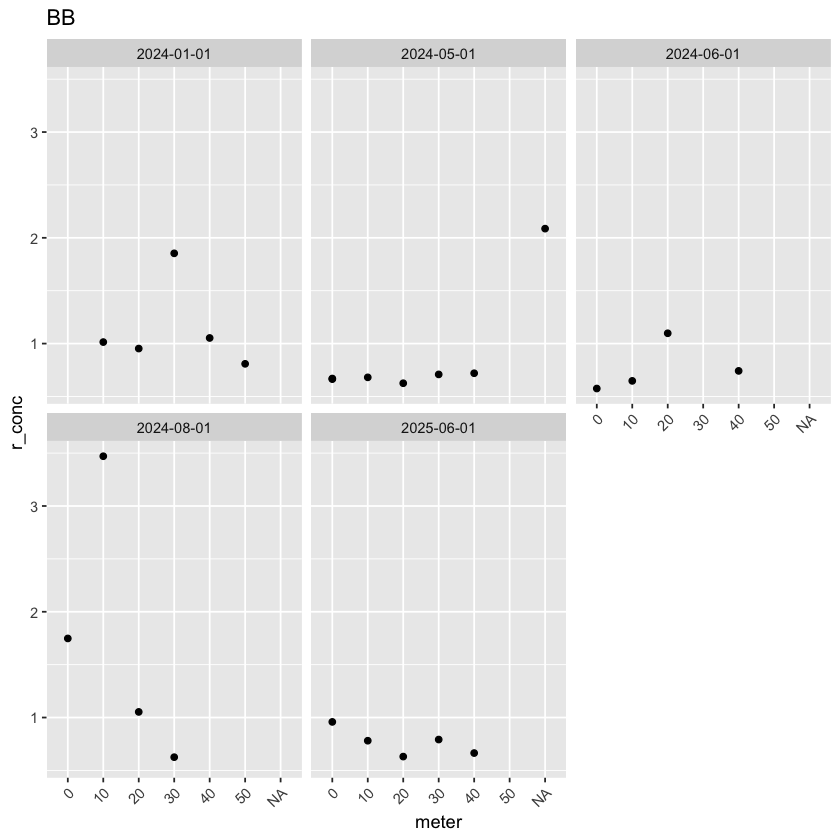

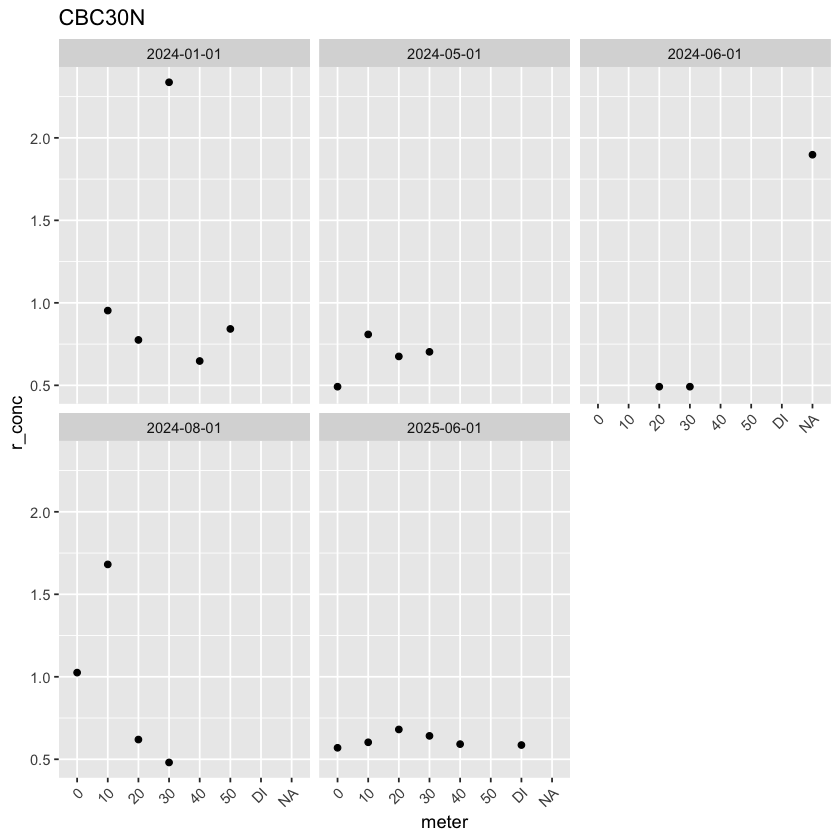

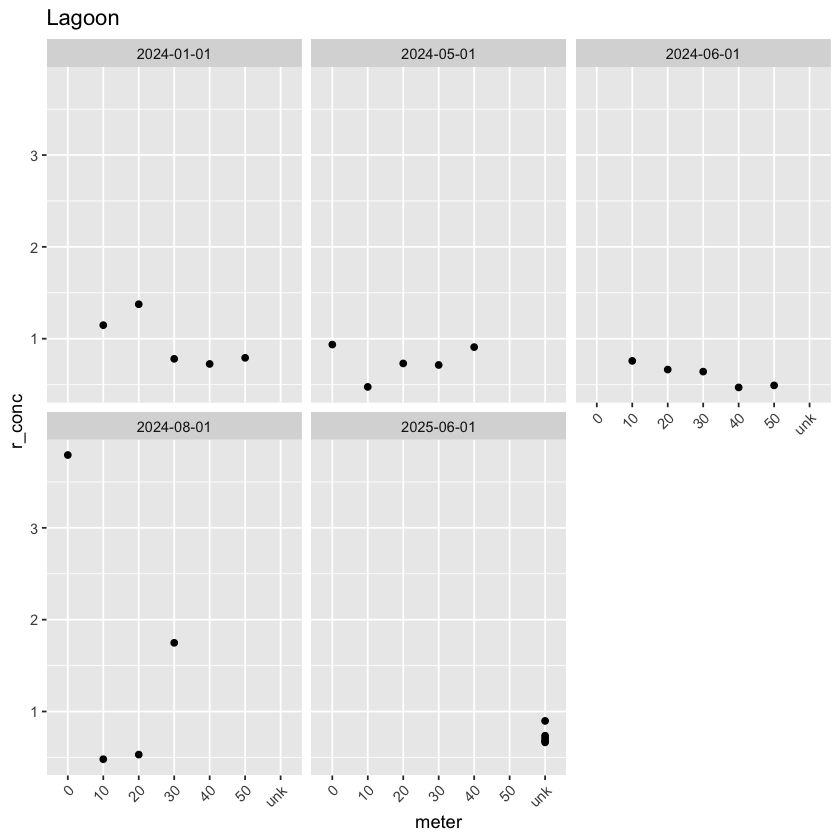

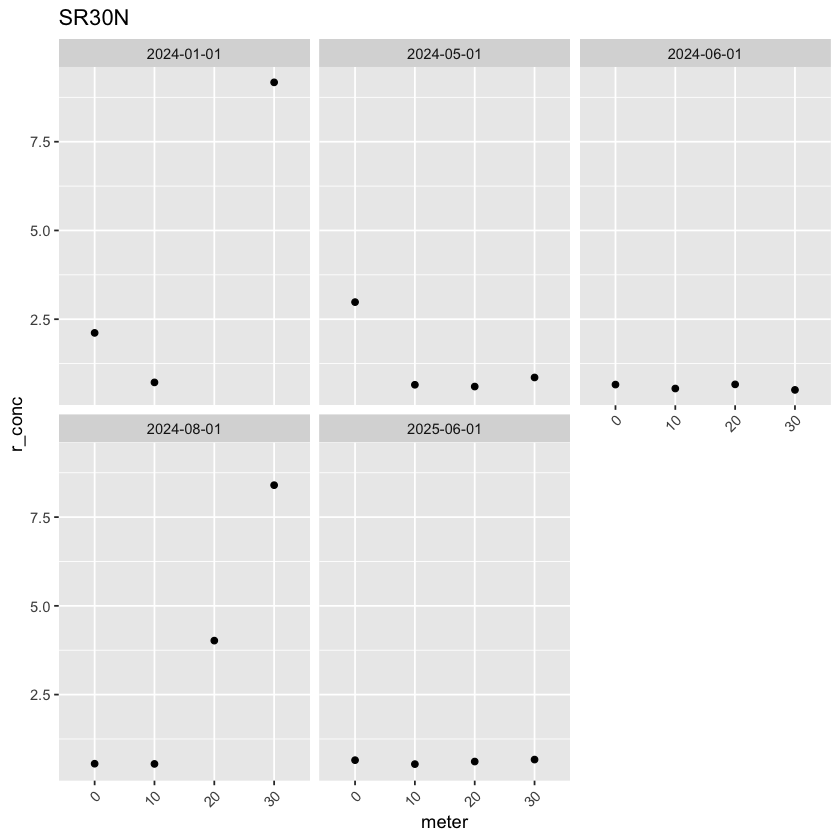

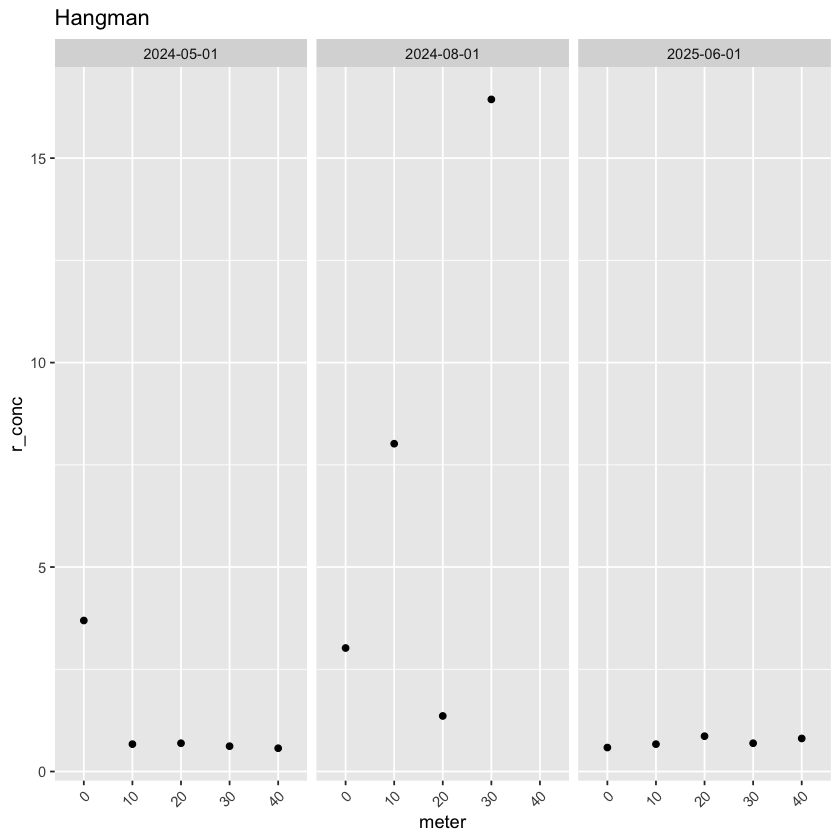

In [465]:
# variation within site within sample time point 
for (sites in unique(samples$site)){
    x<-ggplot(samples%>%filter(site==sites), aes(x = meter, y = r_conc))+
        geom_point()+
        facet_wrap(~ Date)+
        # scale_x_date(breaks = unique(samples$meter))+
        labs(title = sites)+
        theme(axis.text.x = element_text(angle = 45, hjust = 1))
    print(x)
    }